<h1><span style="color: #6495ED;">Elevating Air Quality Predictions: Unleashing Prophet for Accurate Air Quality Index Modeling</span></h1>

Prepared by Lipsita Tripathy

Email: lipsitalt@gmail.com

January 2024

### Importing Necessary Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

### Reading CSV Data into DataFrame

In [2]:
df = pd.read_csv('data/generated/Delhi_AQI_final_df_before_modeling.csv')
df.head()

,Datetime,AQI,PM2.5 (ug/m3),PM10 (ug/m3),NOx (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (ug/m3),Ozone (ug/m3),RH (%),...,t_CO (ug/m3),t_Ozone (ug/m3),t_WS (m/s),t_SR (W/mt2),t_Volatility_Last_24hr,t_Volatility_Last_7d,t_Volatility_Last_30d,t_AQI_lag_24hr,t_AQI_lag_48hr,t_AQI_lag_168hr
0,2013-01-01 00:00:00,354.0,290.774583,292.631667,117.224563,75.685556,9.992130,5.052250,13.794630,88.716778,...,1.800430,2.694264,0.314162,3.714195,2.230820,3.405326,4.138828,5.831882,5.961005,6.075346
1,2013-01-01 01:00:00,358.0,275.749821,296.150000,88.122976,66.740556,9.477546,7.665310,9.977963,89.612778,...,2.159328,2.395890,0.330103,3.673794,2.353812,3.397713,4.138876,5.823046,5.966147,6.073045
2,2013-01-01 02:00:00,362.0,271.463472,309.030000,61.464690,57.030556,9.207963,10.777421,7.316574,91.010556,...,2.466184,2.118250,0.329304,3.455326,2.475083,3.389909,4.138987,5.814131,5.971262,6.068426
3,2013-01-01 03:00:00,367.0,279.071667,317.826667,47.583524,43.298333,10.871667,11.793810,7.910146,91.930000,...,2.548961,2.187191,0.326422,3.079282,2.592957,3.382300,4.139163,5.805135,5.973810,6.061457
4,2013-01-01 04:00:00,370.0,269.118333,308.521667,43.535333,32.023333,11.020833,10.027778,9.348849,92.335556,...,2.400417,2.336875,0.379197,2.525195,2.692013,3.374865,4.139385,5.802118,5.971262,6.056784


### Converting 'Datetime' Column to Datetime Format

The 'Datetime' column in the dataframe (`df`) is transformed into the datetime format through the `pd.to_datetime` function. 

In [3]:
# Convert 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

### Preparing Data for Prophet Modeling

For the application of Prophet modeling, we focus on selecting essential columns, including 'Datetime' and the target variable 'y_AQI'. The resulting dataframe (`df_prophet`) is then structured to meet Prophet's requirements by renaming columns to 'ds' (for datetime) and 'y' (for the target variable). This step ensures the compatibility of the data with the Prophet modeling framework.

In [4]:
# selecting only the datettime and the target column
df_prophet = df[['Datetime', 'y_AQI']].copy()

# Rename columns to match Prophet's requirements
df_prophet.columns = ['ds', 'y']

# Verify the structure of the df_prophet DataFrame
df_prophet.head()

,ds,y
0,2013-01-01 00:00:00,389.0
1,2013-01-01 01:00:00,389.0
2,2013-01-01 02:00:00,386.0
3,2013-01-01 03:00:00,384.0
4,2013-01-01 04:00:00,382.0


Checking the shape of the dataframe(how many rows and columns)

In [5]:
df_prophet.shape

(89784, 2)

### Manually split the data for train and test:

The dataset is split into training and testing sets to facilitate model training and evaluation. The training set includes data up to August 2022, while the test set comprises data from September 2022 onwards.

In [6]:
# Create training and testing datasets
train_data = df_prophet[df_prophet['ds'] < '2022-03-01']
test_data = df_prophet[df_prophet['ds'] >= '2022-03-01']

# Verify the shapes of the training and testing datasets
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (80304, 2)
Testing Data Shape: (9480, 2)


### Prophet Modeling

Instantiate and fit the prophet model

In [7]:
# Create a Prophet model
model = Prophet()

# Fit the model with training data
model.fit(train_data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


### Generating Prophet Predictions
To forecast future values, a custom DataFrame is created for both the training and test sets, including only their respective dates. Predictions are then generated using the trained Prophet model for both sets. This enables the comparison of predicted values with actual values to evaluate model performance.

In [8]:
# Create a dataframe with future dates for the training and test set
future_train = pd.DataFrame({'ds': train_data['ds']}) # This custom dataframe includes only the exact dates present in the training set (train['ds']).
future_test = pd.DataFrame({'ds': test_data['ds']}) # This custom dataframe includes only the exact dates present in the test set (test['ds']).

# Generate predictions for the future dates (for both train and test)
train_forecast = model.predict(future_train)
test_forecast = model.predict(future_test)

### Extracting and Renaming Prophet Predictions
Predictions for the training and test sets are extracted and columns are renamed as follows:

- For the training set, the 'ds' and 'yhat' columns are selected and renamed to 'ds' and 'yhat_train', respectively.

- For the test set, the 'ds' and 'yhat' columns are selected and renamed to 'ds' and 'yhat_test', respectively.

These steps facilitate clearer identification and differentiation of predicted values for subsequent analysis.

In [9]:
# Extract predictions for the training set and rename columns
train_forecast_1 = train_forecast[['ds', 'yhat']]
train_forecast_1.columns = ['ds', 'yhat_train']

# Extract predictions for the test set and rename columns
test_forecast_1 = test_forecast[['ds', 'yhat']]
test_forecast_1.columns = ['ds', 'yhat_test']

### Merging Actual and Predicted Values
Actual and predicted values for both the training and test sets are merged using the 'ds' (date) column:

- For the training set, actual and predicted values are merged using the merge function on the 'ds' column, with the predicted values labeled as 'yhat_train'.

- For the test set, the merging process is similar, and predicted values are labeled as 'yhat_test'.

This merging operation combines the actual and forecasted values into single DataFrames for further analysis or visualization.

In [10]:
# Merge actual and predicted values for the training set
merged_train = pd.merge(train_data, train_forecast_1, on='ds', how='left')

# Merge actual and predicted values for the test set
merged_test = pd.merge(test_data, test_forecast_1, on='ds', how='left')

### Evaluation Metrics Calculation
- Mean Squared Error (MSE)
- R-squared (R²)

In [11]:
# Calculate evaluation metrics for the training set
mse_train = mean_squared_error(merged_train['y'], merged_train['yhat_train'])
r2_train = r2_score(merged_train['y'], merged_train['yhat_train'])

# Calculate evaluation metrics for the test set
mse_test = mean_squared_error(merged_test['y'], merged_test['yhat_test'])
r2_test = r2_score(merged_test['y'], merged_test['yhat_test'])

print(f'Training Set Mean Squared Error: {mse_train}')
print(f'Training Set R-squared: {r2_train}')
print(f'Test Set Mean Squared Error: {mse_test}')
print(f'Test Set R-squared: {r2_test}')


Training Set Mean Squared Error: 5122.409948975696
Training Set R-squared: 0.6288645855983689
Test Set Mean Squared Error: 4254.930336638368
Test Set R-squared: 0.618522090227356


### Percentage Mean Absolute Error (PMAE) Calculation
A function is defined to calculate the Percentage Mean Absolute Error (PMAE) between actual and predicted values.
PMAE is then computed for both the training and test sets using this function. The results are printed, providing insights into the accuracy of the model predictions.

In [12]:
# Define a function to calculate Percentage Mean Absolute Error (PMAE)
def calculate_pmae(actual, predicted):
    absolute_percentage_errors = np.abs((actual - predicted) / actual)
    pmae = np.mean(absolute_percentage_errors) * 100
    return pmae

# Calculate PMAE for the training set
pmae_train = calculate_pmae(merged_train['y'], merged_train['yhat_train'])

# Calculate PMAE for the test set
pmae_test = calculate_pmae(merged_test['y'], merged_test['yhat_test'])

# Print the results
print(f'Training Set PMAE: {pmae_train:.2f}%')
print(f'Test Set PMAE: {pmae_test:.2f}%')

Training Set PMAE: 25.95%
Test Set PMAE: 32.12%


### Visualizing Prophet Forecasts
Visualizations of the Prophet model forecasts for both the training and test sets

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


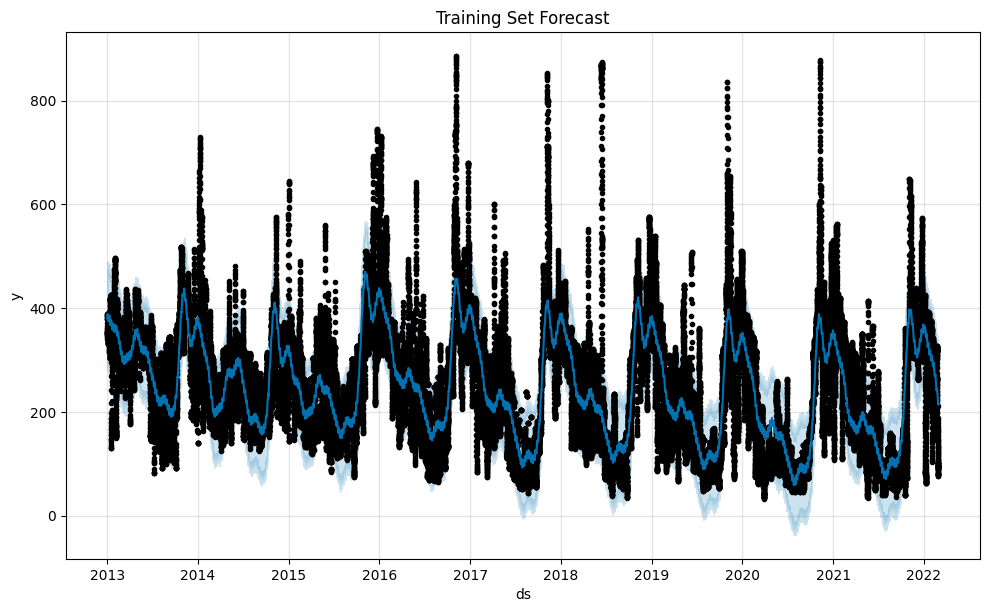

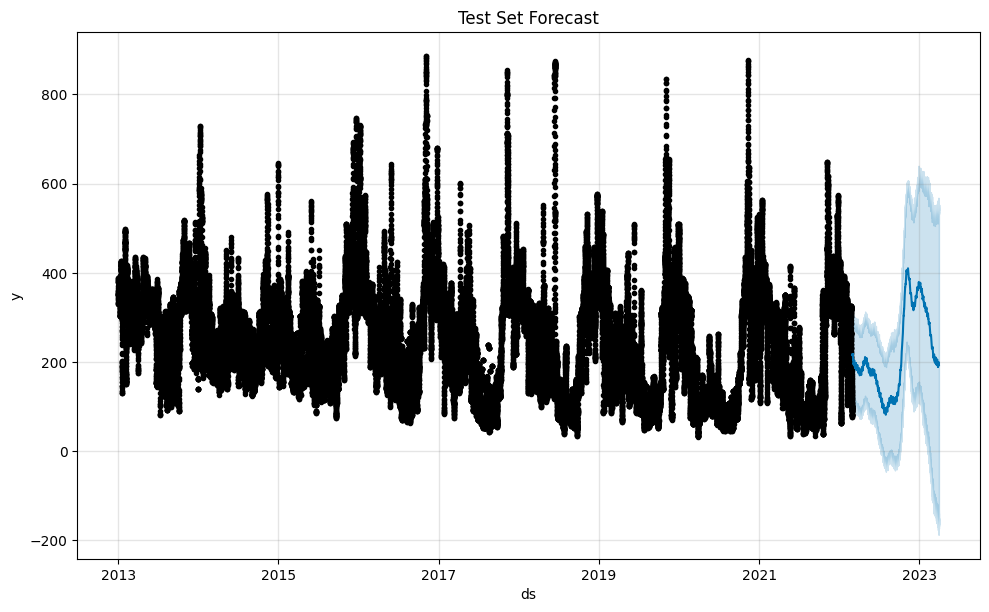

In [13]:
# Plot the training set forecast
fig_train = model.plot(train_forecast)
plt.title('Training Set Forecast')
plt.show()

# Plot the test set forecast
fig_test = model.plot(test_forecast)
plt.title('Test Set Forecast')
plt.show()

### Visualizing Prophet Components
visualizes the Day of Week, Day of Year, and Hour of Day trends over time using the Prophet model. Additionally, it includes the 'ds' (date) component in the visualization

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version thi

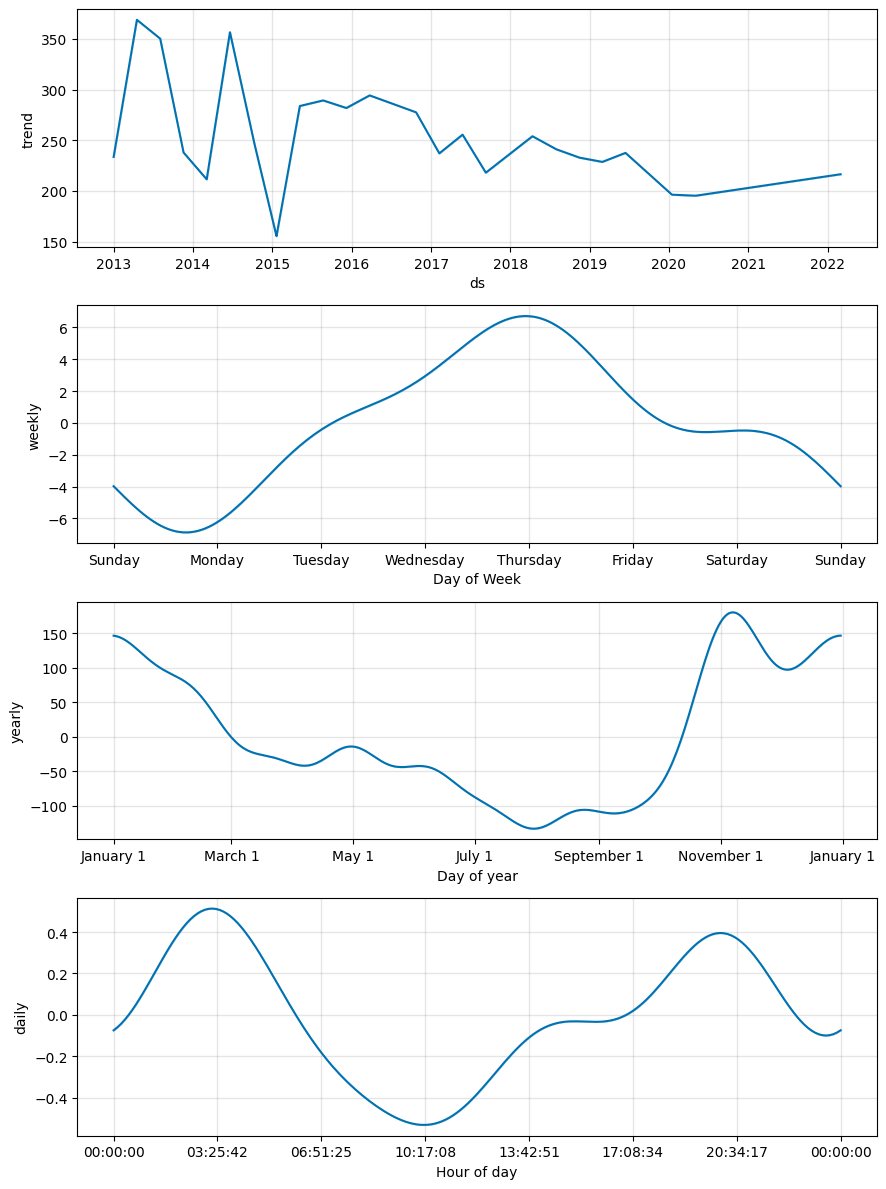

In [14]:
fig = model.plot_components(train_forecast)
plt.show()

## Conclusion:

The Prophet model was utilized to forecast the next 24 hours' Air Quality Index (AQI). The achieved Percentage Mean Absolute Errors (PMAE) were 25.84% for the training set and 31.79% for the test set.

- The moderate PMAE values suggest a notable level of prediction error, indicating the model's room for improvement.

- Recommendations include further refinement through parameter tuning, feature exploration, or considering alternative time series modeling methods.

- Despite moderate accuracy, the model effectively captures temporal trends such as Day of Week, Day of Year, and Hour of Day.